In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%autosave 1

Autosaving every 1 seconds


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

the number is 0



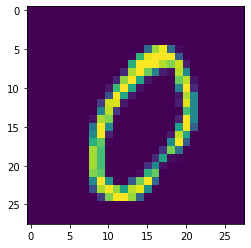

In [29]:
from random import randint

num_ = randint(0,len(x_train))

plt.imshow(x_train[num_]);

print(f"the number is {y_train[num_]}\n")

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
from tensorflow import keras

In [17]:
%%time 
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

CPU times: total: 31.2 ms
Wall time: 30.9 ms


In [18]:
%%time
model.fit(x_train, y_train,batch_size=None ,epochs=100,validation_split=0.2,workers=-1,use_multiprocessing=True)

Epoch 1/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4606 - accuracy: 0.8624 - val_loss: 0.1942 - val_accuracy: 0.9451
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2691 - accuracy: 0.9205 - val_loss: 0.1515 - val_accuracy: 0.9568
Epoch 3/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2270 - accuracy: 0.9344 - val_loss: 0.1362 - val_accuracy: 0.9612
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2053 - accuracy: 0.9381 - val_loss: 0.1203 - val_accuracy: 0.9650
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1902 - accuracy: 0.9436 - val_loss: 0.1156 - val_accuracy: 0.9681
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1730 - accuracy: 0.9475 - val_loss: 0.1067 - val_accuracy: 0.9702
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1620 - accuracy: 0.9509 - val_loss: 0.1075 - val_ac

1500/1500 [==============================] - 3s 2ms/step - loss: 0.0833 - accuracy: 0.9730 - val_loss: 0.1131 - val_accuracy: 0.9754
Epoch 58/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0776 - accuracy: 0.9732 - val_loss: 0.1142 - val_accuracy: 0.9758
Epoch 59/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0786 - accuracy: 0.9745 - val_loss: 0.1194 - val_accuracy: 0.9747
Epoch 60/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0829 - accuracy: 0.9720 - val_loss: 0.1189 - val_accuracy: 0.9753
Epoch 61/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0813 - accuracy: 0.9730 - val_loss: 0.1148 - val_accuracy: 0.9754
Epoch 62/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0793 - accuracy: 0.9730 - val_loss: 0.1189 - val_accuracy: 0.9761
Epoch 63/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9744 - val_loss: 0.1303 - val_accuracy

In [19]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1465 - accuracy: 0.9759


[0.14647479355335236, 0.9758999943733215]

In [20]:
pred=model.predict(x_train)

In [21]:
y_hat = []
for j in range(len(pred)):
    y_hat.append(pred[j].tolist().index(max(pred[j].tolist())))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_hat,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5919
           1       1.00      1.00      1.00      6736
           2       0.99      0.99      0.99      5946
           3       0.99      0.99      0.99      6168
           4       1.00      0.99      0.99      5855
           5       0.99      0.99      0.99      5438
           6       1.00      1.00      1.00      5914
           7       1.00      0.99      0.99      6284
           8       0.99      0.99      0.99      5833
           9       0.99      0.99      0.99      5907

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

